# PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
%matplotlib inline

## Read and preprocess

In [3]:
# Read data
df_train = pd.read_csv("../data/music_genre_train.csv")
#df_test = pd.read_csv("../data/music_genre_test.csv")

# Drop unneeded features
df_train = df_train.drop(['instance_id', 'artist_name', 'track_name', 'obtained_date'], axis=1)

# Drop missing values
df_train = df_train.dropna()
df_train = df_train[df_train['tempo'] != '?']
df_train = df_train[df_train['duration_ms'] != -1]
df_train = df_train[df_train['loudness'] != 0]

# Convert tempo dtype from 'object' to 'float64'
df_train['tempo'] = df_train['tempo'].astype('float64')

# Separate categorical features
columns_cat = ['key', 'mode']
df_train_cat = df_train[columns_cat]
df_train = df_train.drop(columns_cat, axis=1)

# One-hot
df_train_cat = pd.get_dummies(df_train_cat)

# Concatenate categorical columns with others
df_train = pd.concat([df_train, df_train_cat], axis=1)

# Encode output categories into integers
label_encoder = LabelEncoder()
label_encoder.fit(df_train['music_genre'])
df_train['music_genre'] = label_encoder.transform(df_train['music_genre'])

# Transform loudness from db into power (take logarithm base 10)
#df_train['loudness'] = df_train['loudness'].apply(lambda x : x + 60)
#df_train['loudness'] = df_train['loudness'].apply(lambda x : x / 10)
#df_train['loudness'] = df_train['loudness'].apply(lambda x : np.power(10, x))

# Get polynomical features
cols_float = df_train.columns[df_train.dtypes == 'float64']
df_train_float = df_train[cols_float]
poly_features = PolynomialFeatures(
    degree=2,
    interaction_only=False,
    include_bias=False
)
df_train_float = poly_features.fit_transform(df_train_float)
cols_poly = poly_features.get_feature_names(cols_float)
df_train_float = pd.DataFrame(df_train_float, columns=cols_poly, index=df_train.index)

# Scale features
std_scaler = StandardScaler()
df_train_float[:] = std_scaler.fit_transform(df_train_float)

# Put floats/polynomials back into original dataframe
df_train = df_train.drop(cols_float, axis=1)
df_train = pd.concat((df_train_float, df_train), axis=1)

C:\Users\Saveliy\anaconda3\envs\ids\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [4]:
X = df_train.drop('music_genre', axis=1)
y = df_train['music_genre']

## PCA itself

In [5]:
pca = PCA(n_components = 2)
X_reduced_pca = pca.fit_transform(X)

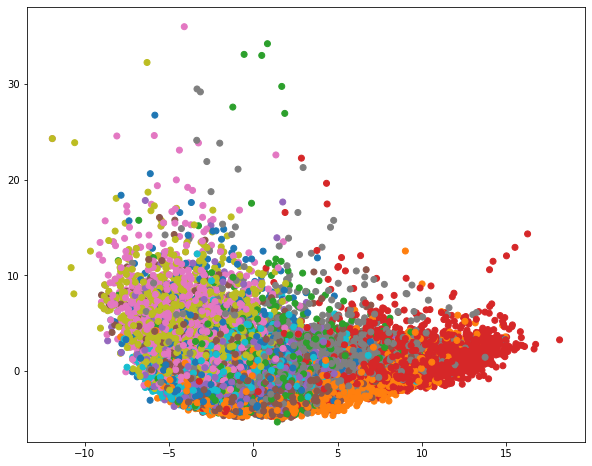

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(
    X_reduced_pca[:,0],
    X_reduced_pca[:,1],
    c = y,
    cmap = 'tab10'
)
plt.savefig('../images/pca.png')
plt.show()

## t-SNE

In [7]:
tsne = TSNE(n_components = 2)
X_reduced_tsne = tsne.fit_transform(X)

C:\Users\Saveliy\anaconda3\envs\ids\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Saveliy\anaconda3\envs\ids\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


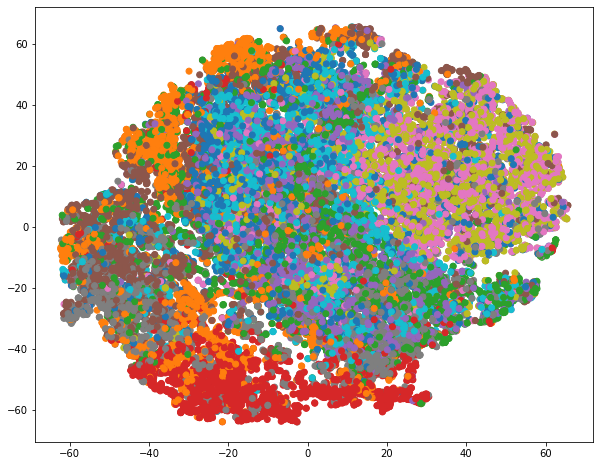

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(
    X_reduced_tsne[:,0],
    X_reduced_tsne[:,1],
    c = y,
    cmap = 'tab10'
)
plt.savefig('../images/tsne.png')
plt.show()